In [ ]:
import numpy as np                  # data processing 
import pandas as pd                 # data processing
from sklearn.preprocessing import StandardScaler # data processing
import os                           # data processing

import seaborn as sns             # for plotting
import matplotlib.pyplot as plt   # for plotting

from keras.models import Sequential  # deep learning
from keras.layers.core import Dense  # deep learning
from keras.optimizers import Adam    # deep learning

In [ ]:
current_dir = os.getcwd()
datasets_dir = current_dir + '/dataset'

ds_train = datasets_dir +'/train.csv'
ds_dev = datasets_dir + '/dev.csv'
ds_test = datasets_dir + '/test.csv'

In [ ]:
def load_dataset(dataset):
    '''
    Load dataset as pandas dataframe.
    '''
    dataset_frame = pd.read_csv(dataset)
    print(f"{dataset.split(sep='/')[-1]} is loaded")
    return dataset_frame

In [ ]:
# Load datasets as dataframe
df_train = load_dataset(ds_train)
df_dev = load_dataset(ds_dev)
df_test = load_dataset(ds_test)

train.csv is loaded
dev.csv is loaded
test.csv is loaded


In [ ]:
df_train.head() # look first 5 row.

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,NaN,27.2450,426.0,NaN,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,NaN,27.2000,426.0,NaN,0.004757,1


date time year-month-day hour:minute:second

Temperature, in Celsius

Light, in Lux\
The light sensor is a passive device that converts the light energy into an electrical signal output. Light sensors are more commonly known as Photoelectric Devices or Photo Sensors because they convert light energy (photons) into electronic signal (electrons). The sensor receives the light reflected from the target.

CO2, in ppm (parts per million)\
CO2 sensors commonly use Infrared technology for gas sensing. This type of sensor measures carbon dioxide levels by measuring the amount of Infrared radiations absorbed by the molecules.

Relative Humidity, %\
Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air\
A humidity sensor is a device that detects and measures water vapor. These humidity detectors provide accurate measurement of dew point and absolute humidity by combining relative humidity (RH) and temperature (T) measurements.

Motion\
A passive infrared sensor (PIR sensor) is an electronic sensor that measures infrared (IR) light radiating from objects in its field of view. They are most often used in PIR-based motion detectors. PIR sensors are commonly used in security alarms and automatic lighting applications.

Occupancy, 0 or 1, 0 for not occupied, 1 for occupied *status*

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    7763 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            7633 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [ ]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.9+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 533.4+ KB


In [ ]:
def isMissingValue(df,name):
  
  na_checker = df.isna().any().sum()
  if na_checker > 0:
    print("Are there any missing/NaN values in ",name,"set? : Yes")
    print("\n\tCounts")
    print(df.isna().sum())
  else:
    print("Are there any missing/NaN values in ",name,"set? : No ")

In [ ]:
isMissingValue(df_train,'Train')
isMissingValue(df_dev,'Dev')
isMissingValue(df_test,'Test')

Are there any missing/NaN values in  Train set? : Yes

	Counts
date               0
Temperature      380
Humidity           0
Light              0
CO2              510
HumidityRatio      0
Occupancy          0
dtype: int64
Are there any missing/NaN values in  Dev set? : No 
Are there any missing/NaN values in  Test set? : No 


In [ ]:
'''
We can see there are missing values in train dataset. Other datasets have not missing values.
So let's fill missing values in train dataset.
'''

"\nWe can see there are missing values in train dataset. Other datasets have not missing values.\nSo let's fill missing values in train dataset.\n"

In [ ]:
def divide_dataset(dataset,cols_X,col_y):
    '''
    This function split our dataset as X and y. 
    Input : the dataset path.
    '''
    X = pd.read_csv(dataset,sep=',',usecols = cols_X)
    y = pd.read_csv(dataset,sep=',',usecols = col_y)
    print(f"{dataset.split(sep='/')[-1]} is splitted as X and y")
    return X,y

cols_X = ['date','Temperature','Humidity','Light','CO2','HumidityRatio']
col_y = ['Occupancy']

df_train_X,df_train_y = divide_dataset(ds_train,cols_X,col_y)
df_dev_X,df_dev_y = divide_dataset(ds_dev,cols_X,col_y)
df_test_X,df_test_y = divide_dataset(ds_test,cols_X,col_y)


train.csv is splitted as X and y
dev.csv is splitted as X and y
test.csv is splitted as X and y


In [ ]:
def fillAsMean(df,missing_features):
  
    size = len(missing_features)
    for i in range(size):
      feature_name = missing_features[i]
      avg = np.mean(df.get(feature_name)) 
      df[feature_name] = df[feature_name].fillna(avg)
      print(f'Missing values are filled with average of {feature_name} columns.')
    return df

In [ ]:
missing_features = ['Temperature','CO2']

df_train_X = fillAsMean(df_train_X,missing_features)

Missing values are filled with average of Temperature columns.
Missing values are filled with average of CO2 columns.


In [ ]:
df_train_X.isna().any()

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
dtype: bool

In [ ]:
df_dev_X.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027
std,1.028024,2.436842,250.210906,292.681718,0.000611
min,20.200000,22.100000,0.000000,427.500000,0.003303
25%,20.650000,23.260000,0.000000,466.000000,0.003529
50%,20.890000,25.000000,0.000000,580.500000,0.003815
75%,22.356667,26.856667,442.500000,956.333333,0.004532
max,24.408333,31.472500,1697.250000,1402.250000,0.005378


In [ ]:
df_test_X.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589
std,1.020693,3.952844,208.221275,297.096114,0.000531
min,19.500000,21.865000,0.000000,484.666667,0.003275
25%,20.290000,26.642083,0.000000,542.312500,0.004196
50%,20.790000,30.200000,0.000000,639.000000,0.004593
75%,21.533333,32.700000,208.250000,831.125000,0.004998
max,24.390000,39.500000,1581.000000,2076.500000,0.005769


In [ ]:
df_train_X.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
dtype: object

In [ ]:
def dateTimeConverter(df):

  try:
    df["date"] = pd.to_datetime(df["date"])
    df["date"] = pd.Float64Index(df["date"])
    print("Date time converting process is successed.")
  except:
    print("Exception Occured Step: Datetime Convert!")
  return df


In [ ]:
df_train_X = dateTimeConverter(df_train_X)
df_dev_X = dateTimeConverter(df_dev_X)
df_test_X = dateTimeConverter(df_test_X)

Date time converting process is successed.
Date time converting process is successed.
Date time converting process is successed.


In [ ]:
df_train_X.dtypes

date             float64
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
dtype: object

In [ ]:
def trundle(df,features):
  
  for feature_name in features:
    df[feature_name] = round(df[feature_name],5)
    print(feature_name," Rounded operation is successful !")
  print("\n\n")
  return df

In [ ]:
features = df_train_X.columns
df_train_X = trundle(df_train_X,features)
df_dev_X = trundle(df_dev_X,features)
df_test_X = trundle(df_test_X,features)

date  Rounded operation is successful !
Temperature  Rounded operation is successful !
Humidity  Rounded operation is successful !
Light  Rounded operation is successful !
CO2  Rounded operation is successful !
HumidityRatio  Rounded operation is successful !



date  Rounded operation is successful !
Temperature  Rounded operation is successful !
Humidity  Rounded operation is successful !
Light  Rounded operation is successful !
CO2  Rounded operation is successful !
HumidityRatio  Rounded operation is successful !



date  Rounded operation is successful !
Temperature  Rounded operation is successful !
Humidity  Rounded operation is successful !
Light  Rounded operation is successful !
CO2  Rounded operation is successful !
HumidityRatio  Rounded operation is successful !





In [ ]:
df_train_X

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,1.423072e+18,23.18000,27.2720,426.0,721.25000,0.00479
1,1.423072e+18,23.15000,27.2675,429.5,714.00000,0.00478
2,1.423072e+18,20.57617,27.2450,426.0,604.03209,0.00478
3,1.423072e+18,23.15000,27.2000,426.0,708.25000,0.00477
4,1.423072e+18,20.57617,27.2000,426.0,604.03209,0.00476
...,...,...,...,...,...,...
8138,1.423561e+18,21.05000,36.0975,433.0,787.25000,0.00558
8139,1.423561e+18,21.05000,35.9950,433.0,789.50000,0.00556
8140,1.423561e+18,21.10000,36.0950,433.0,798.50000,0.00560
8141,1.423561e+18,21.10000,36.2600,433.0,820.33333,0.00562


In [ ]:

def add_TempLight(df):
  df_has_new_feature = df
  df_has_new_feature.columns = df.columns
  try:
    df_has_new_feature['Temp*Light']=df_has_new_feature['Temperature'] * (df_has_new_feature)["Light"]
    print("Temp x Ligth feature is added !")
  except:
    print("Exception occured: Co2 x HR feature is NOT added !")
  return (df_has_new_feature)

def add_CO2Temp(df):
  df_has_new_feature = df
  df_has_new_feature.columns = df.columns
  try:
    df_has_new_feature['CO2*Temp']=df_has_new_feature['CO2'] * (df_has_new_feature)["Temperature"]
    print("Co2 x Temperature feature is added !")
  except:
    print("CO2 x Temperature feature is NOT added !")
  return (df_has_new_feature)


In [ ]:
# Add new Features All Datasets.
print("Train-Set")
train_X = add_TempLight(df_train_X)
train_X = add_CO2Temp(df_train_X)
print("\nDev-Set")
dev_X = add_TempLight(df_dev_X)
dev_X = add_CO2Temp(df_dev_X)
print("\nTest-Set")
test_X = add_TempLight(df_test_X)
test_X = add_CO2Temp(df_test_X)

Train-Set
Temp x Ligth feature is added !
Co2 x Temperature feature is added !

Dev-Set
Temp x Ligth feature is added !
Co2 x Temperature feature is added !

Test-Set
Temp x Ligth feature is added !
Co2 x Temperature feature is added !


In [ ]:

scaler = StandardScaler()
def df_scaler(df,name):
  '''
  Input : df - dataframe
          name - dataframe's name.
  Output : df - dataframe is scaled.
  '''
  try:
    df_scaled = scaler.fit_transform(df)
    df = pd.DataFrame(df_scaled,columns=df.columns)
    print(name,"is scaled successfully!")
  except:
    print("Exception occured step: Train Scaling!")
  return df

In [ ]:
train_X_scaled = df_scaler(train_X,'Train')
dev_X_scaled = df_scaler(dev_X,'Dev')
test_X_scaled = df_scaler(test_X,'Test')

Train is scaled successfully!
Dev is scaled successfully!
Test is scaled successfully!


In [ ]:
train_X

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Temp*Light,CO2*Temp
0,1.423072e+18,23.18000,27.2720,426.0,721.25000,0.00479,9874.68000,16718.575000
1,1.423072e+18,23.15000,27.2675,429.5,714.00000,0.00478,9942.92500,16529.100000
2,1.423072e+18,20.57617,27.2450,426.0,604.03209,0.00478,8765.44842,12428.666969
3,1.423072e+18,23.15000,27.2000,426.0,708.25000,0.00477,9861.90000,16395.987500
4,1.423072e+18,20.57617,27.2000,426.0,604.03209,0.00476,8765.44842,12428.666969
...,...,...,...,...,...,...,...,...
8138,1.423561e+18,21.05000,36.0975,433.0,787.25000,0.00558,9114.65000,16571.612500
8139,1.423561e+18,21.05000,35.9950,433.0,789.50000,0.00556,9114.65000,16618.975000
8140,1.423561e+18,21.10000,36.0950,433.0,798.50000,0.00560,9136.30000,16848.350000
8141,1.423561e+18,21.10000,36.2600,433.0,820.33333,0.00562,9136.30000,17309.033263


In [ ]:
train_X_scaled_final = df_scaler(train_X,'Train')
dev_X_scaled_final = df_scaler(dev_X,'Dev')
test_X_scaled_final = df_scaler(test_X,'Test')

Train is scaled successfully!
Dev is scaled successfully!
Test is scaled successfully!


In [ ]:
train_ds = pd.merge(train_X_scaled_final,df_train_y,left_index=True,right_index=True)
dev_ds = pd.merge(dev_X_scaled_final,df_dev_y,left_index=True,right_index=True)
test_ds = pd.merge(test_X_scaled_final,df_test_y,left_index=True,right_index=True)

In [ ]:
def showAllCounts():
    df_train_counts = list(df_train[df_train.columns].count())
    df_dev_counts = list(df_dev[df_dev.columns].count())
    df_test_counts = list(df_test[df_test.columns].count())
    df_all_counts = [df_train_counts,df_dev_counts,df_test_counts]

    colNames = df_train.columns

    fig = plt.figure(figsize=(20,5))
    plt.bar(colNames,df_all_counts[0],color='c',width=0.30,label='Train',align='center')
    plt.bar(colNames,df_all_counts[1],color='m',width=0.25,label='Dev',align='edge')
    plt.bar(colNames,df_all_counts[2],color='y',width=0.15,label='Test',align='edge')
    plt.legend(loc='best')
    plt.title('Dataset Feature Counts',size=16)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.show()

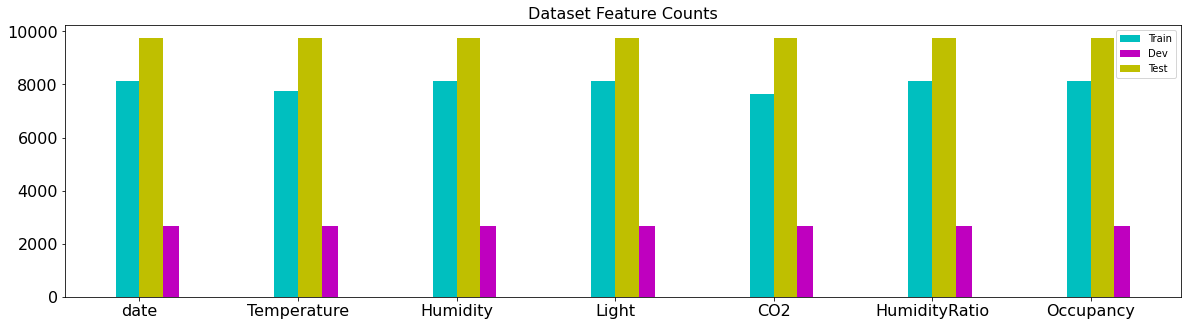

In [ ]:
showAllCounts()

In [ ]:
def showMissingRates():
    missing_temp = df_train.Temperature.isna().sum()
    missing_co2 = df_train.CO2.isna().sum()
    missing_counts = df_train.isna().sum()
    
    all_missing = missing_temp + missing_co2
    not_missing = len(df_train) - all_missing
    
    labels = ['Missing','Not Missing']
    data = [all_missing,not_missing]
    fig = plt.figure(figsize=(10,7))
    plt.pie(data,labels=labels,shadow=True,autopct='%1.1f%%')
    plt.title('Missing/Not Missing Rates',size=16)
    plt.show()
    
    plt.bar(df_train.columns,missing_counts)
    plt.xticks(rotation=90,size=15)
    plt.yticks(size=15)
    plt.title("Missings Counts",size=15)
    plt.show()

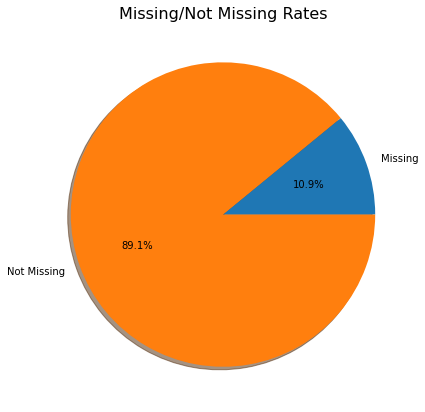

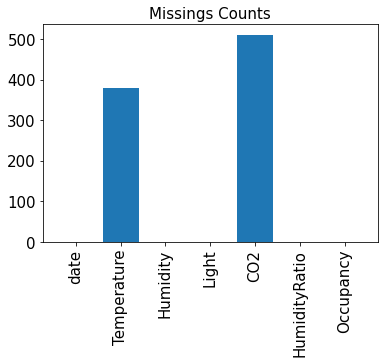

In [ ]:
showMissingRates()

In [ ]:
train_corr = pd.merge(train_X,df_train_y,left_index=True,right_index=True).corr()
dev_corr = pd.merge(dev_X,df_dev_y,left_index=True,right_index=True).corr()
test_corr = pd.merge(test_X,df_test_y,left_index=True,right_index=True).corr()

In [ ]:
def correlationGraph(dataset,ds_name):
    plt.figure(figsize=(12,8))
    sns.heatmap(dataset,annot=True,linewidth=.5)
    plt.title(f' Correlation of features in {ds_name} dataset', fontsize=16)

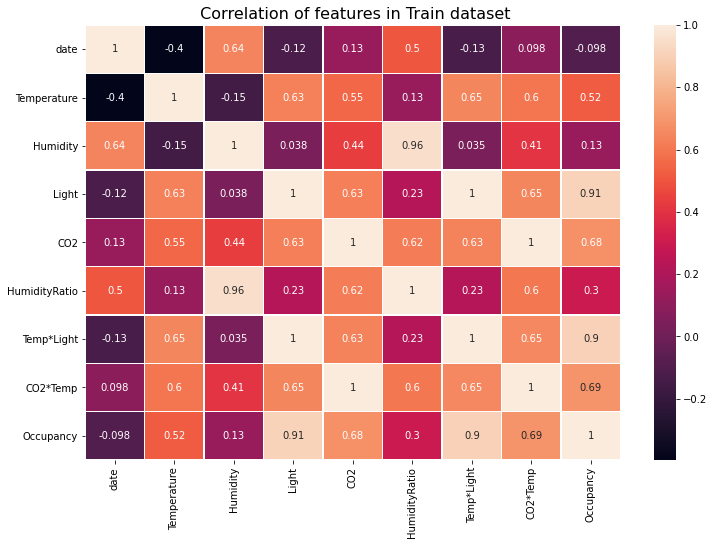

In [ ]:
correlationGraph(train_corr,'Train')

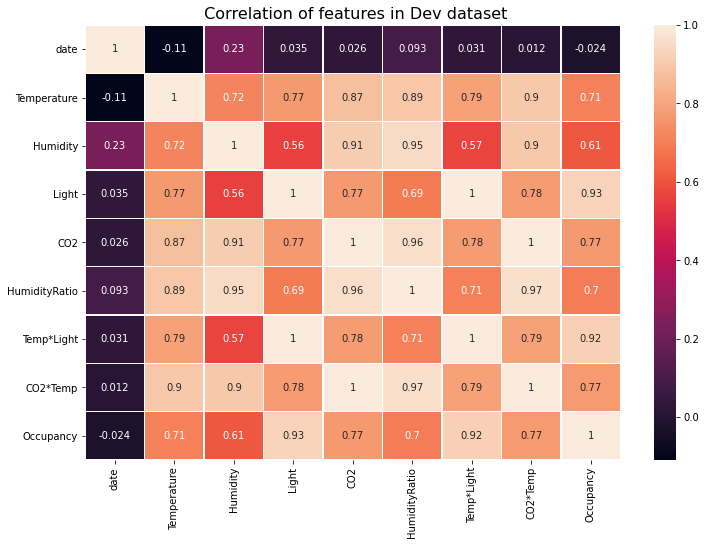

In [ ]:
correlationGraph(dev_corr,'Dev')

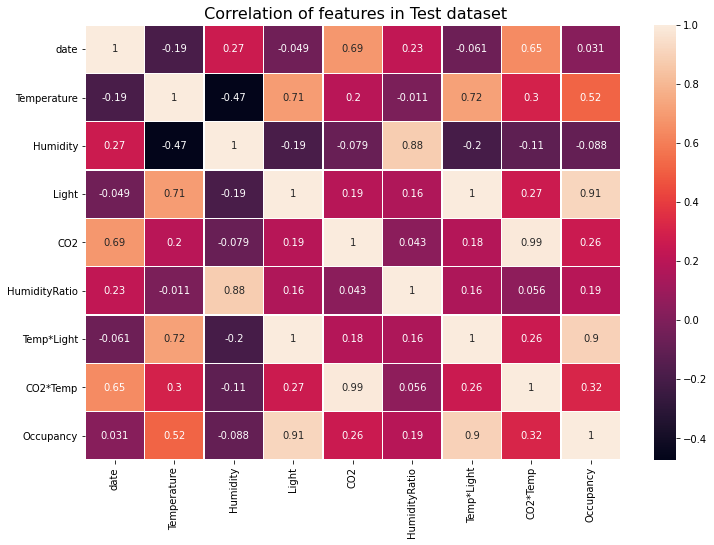

In [ ]:
#Correlation of test_X- features with each other.
correlationGraph(test_corr,'Test')

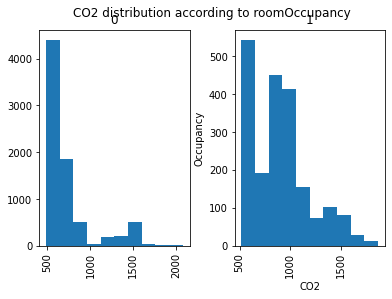

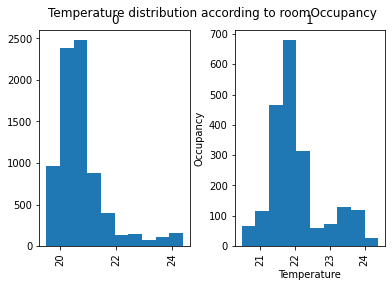

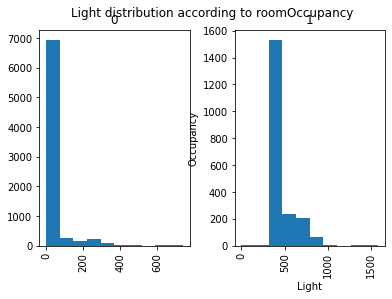

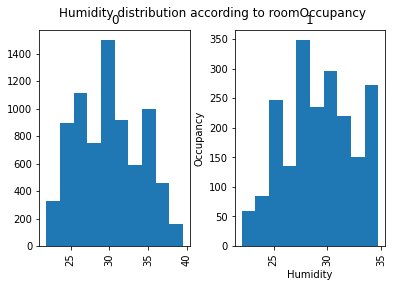

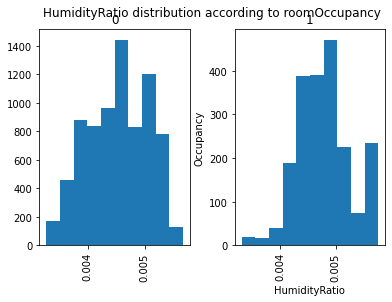

In [ ]:
def fonk(a,b):
    not_missing = df_test[(df_test[a].notnull())]
    not_missing.hist(column = a, by=b)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.suptitle(a + " distribution according to room" +b)
fonk('CO2', 'Occupancy')
fonk('Temperature', 'Occupancy')
fonk('Light','Occupancy')
fonk('Humidity', 'Occupancy')
fonk('HumidityRatio', 'Occupancy')

In [ ]:
X_train = train_X_scaled_final
y_train = df_train_y
X_dev = dev_X_scaled_final
y_dev = df_dev_y
X_test = test_X_scaled_final
y_test = df_test_y

opt = Adam(learning_rate=1e-6)

model = Sequential()
model.add(Dense(20,input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,verbose=1,epochs=330,validation_data = (X_dev,y_dev))

Epoch 1/330
255/255 [==============================] - 1s 3ms/step - loss: 0.2427 - accuracy: 0.9854 - val_loss: 0.2515 - val_accuracy: 0.9730
Epoch 2/330
255/255 [==============================] - 1s 3ms/step - loss: 0.2420 - accuracy: 0.9854 - val_loss: 0.2510 - val_accuracy: 0.9726
Epoch 3/330
255/255 [==============================] - 1s 3ms/step - loss: 0.2414 - accuracy: 0.9854 - val_loss: 0.2505 - val_accuracy: 0.9726
Epoch 4/330
255/255 [==============================] - 1s 3ms/step - loss: 0.2407 - accuracy: 0.9856 - val_loss: 0.2499 - val_accuracy: 0.9726
Epoch 5/330
255/255 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.9856 - val_loss: 0.2494 - val_accuracy: 0.9726
Epoch 6/330
255/255 [==============================] - 1s 3ms/step - loss: 0.2393 - accuracy: 0.9858 - val_loss: 0.2489 - val_accuracy: 0.9726
Epoch 7/330
255/255 [==============================] - 1s 3ms/step - loss: 0.2387 - accuracy: 0.9859 - val_loss: 0.2484 - val_accuracy: 0.9726

In [ ]:
hist_test = model.evaluate(X_test,y_test) # accuracy on test set

305/305 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9891


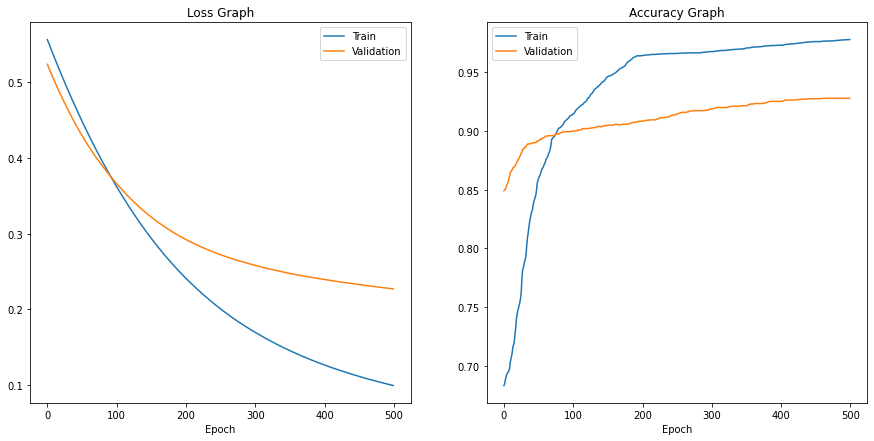

In [ ]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
ax[0].plot(history.history['loss'],label='Train')
ax[0].plot(history.history['val_loss'],label='Validation')
ax[0].set_title('Loss Graph')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'],label='Train')
ax[1].plot(history.history['val_accuracy'],label='Validation')
ax[1].set_title('Accuracy Graph')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='best')

In [ ]:
model.save('mymodel.h5')